# 项目：Gapminder World

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

1、找出各国GDP排名；
2、找出GDP与人均GDP、税收、二氧化碳排放量的关系。

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
% matplotlib inline
df_gdp_total = pd.read_csv('indicator gdp_total_ppp.csv') #gdp总值
df_gdp_per_capita = pd.read_csv('indicator gapminder gdp_per_capita_ppp.csv') #人均gdp
df_co2_emission = pd.read_csv('indicator CDIAC carbon_dioxide_total_emissions.csv') #co2排放量
df_tax_p_gdp = pd.read_csv('Tax revenue (p of GDP).csv') #税收占gdp的比值


<a id='wrangling'></a>
## 数据整理


### 查看前几行数据 是否需要修复

In [48]:
df_gdp_total.head()

,"Total GDP, PPP",1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,...,2.886826e+10,3.243575e+10,3.391424e+10,3.852922e+10,3.949311e+10,4.745770e+10,5.127459e+10,5.485222e+10,6.296537e+10,6.577931e+10
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3.255389e+08,3.268997e+08,3.282668e+08,3.296397e+08,3.310174e+08,3.324016e+08,3.337915e+08,3.351872e+08,3.365894e+08,...,2.108705e+10,2.225307e+10,2.353664e+10,2.491342e+10,2.671594e+10,2.759180e+10,2.851832e+10,2.933449e+10,3.010885e+10,3.072946e+10
4,Algeria,3.804956e+09,3.818508e+09,3.832105e+09,3.845754e+09,3.859449e+09,3.873193e+09,3.886987e+09,3.900829e+09,3.914722e+09,...,3.721531e+11,3.921648e+11,3.989152e+11,4.125638e+11,4.208846e+11,4.280311e+11,4.433053e+11,4.535581e+11,4.652569e+11,4.791859e+11


In [49]:
df_gdp_total.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,...,2.210000e+02,2.290000e+02,2.160000e+02,2.130000e+02,2.100000e+02,2.090000e+02,2.090000e+02,2.090000e+02,1.920000e+02,1.860000e+02
mean,4.411492e+09,4.435714e+09,4.467860e+09,4.490653e+09,4.519303e+09,4.549306e+09,4.577604e+09,4.610318e+09,4.624580e+09,4.657344e+09,...,3.268454e+11,3.301370e+11,3.691543e+11,3.941085e+11,4.080194e+11,4.069403e+11,4.273486e+11,4.419628e+11,4.959046e+11,5.248627e+11
std,2.199685e+10,2.215647e+10,2.232631e+10,2.248751e+10,2.265865e+10,2.282980e+10,2.299968e+10,2.317964e+10,2.334470e+10,2.352538e+10,...,1.217457e+12,1.250958e+12,1.350903e+12,1.423859e+12,1.445388e+12,1.447822e+12,1.519720e+12,1.573891e+12,1.710667e+12,1.809055e+12
min,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,1.051406e+06,...,1.305596e+07,1.076214e+06,5.337509e+07,4.985808e+07,7.074108e+07,7.100691e+07,6.828100e+07,6.948174e+07,1.810582e+08,1.854865e+08
25%,5.630411e+07,5.637318e+07,5.644236e+07,5.651166e+07,5.658107e+07,5.665060e+07,5.672024e+07,5.679000e+07,5.685988e+07,5.692987e+07,...,5.013766e+09,3.875687e+09,5.940023e+09,6.781564e+09,7.122397e+09,7.218471e+09,7.484583e+09,7.803531e+09,1.542428e+10,1.598515e+10
50%,4.056987e+08,4.059123e+08,4.061261e+08,4.063401e+08,4.065544e+08,4.067689e+08,4.069836e+08,4.071986e+08,4.074137e+08,4.076291e+08,...,2.652557e+10,2.606729e+10,3.328944e+10,3.559660e+10,4.047278e+10,4.145650e+10,4.315608e+10,4.578705e+10,5.705270e+10,6.097351e+10
75%,1.773369e+09,1.773651e+09,1.773933e+09,1.774215e+09,1.774497e+09,1.774779e+09,1.775062e+09,1.775344e+09,1.775627e+09,1.775910e+09,...,1.856202e+11,1.753883e+11,2.183123e+11,2.308207e+11,2.390656e+11,2.270447e+11,2.307057e+11,2.525494e+11,3.196137e+11,3.627088e+11
max,2.867175e+11,2.891179e+11,2.915383e+11,2.939790e+11,2.964401e+11,2.989219e+11,3.014244e+11,3.039478e+11,3.064924e+11,3.090583e+11,...,1.436054e+13,1.480325e+13,1.519002e+13,1.547331e+13,1.541267e+13,1.487600e+13,1.530389e+13,1.560846e+13,1.606696e+13,1.639324e+13


部分国家没有相关数据，但是猜测主要国家的数据应该比较齐全，下面如有猜测失误重新进行数据清洗。

In [50]:
df_gdp_per_capita.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [51]:
df_co2_emission.head()

,CO2 emission total,1751,1755,1760,1765,1770,1771,1772,1773,1774,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.333333,583.00000,733.333333,997.333333,1272.333333,1888.333333,3776.666667,6314.000000,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3747.333333,4290.00000,4114.000000,4601.666667,4238.666667,4491.666667,4128.666667,3006.666667,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90845.333330,92524.66667,89485.000000,107118.000000,107294.000000,112731.666700,111294.333300,121300.666700,118016.6954,124298.0933


In [52]:
df_tax_p_gdp.head()

,Tax revenue (% of GDP),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.290691,5.288022,5.225979,7.266421,8.313807,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,13.422768,9.409979,10.185762,13.598049,...,16.108918,17.071928,17.29176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.700775,37.203430,45.255818,34.911834,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


由于不同表格更新的时间不同，选取2009年的数据。
### 修改index
由于不同表格中国家对应的index不同，将国家作为index

In [53]:
df_gdp_total.rename(index=str, columns={'Total GDP, PPP':'country'},inplace=True) #将国家名列名称改为country
df_gdp_total.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,...,2.886826e+10,3.243575e+10,3.391424e+10,3.852922e+10,3.949311e+10,4.745770e+10,5.127459e+10,5.485222e+10,6.296537e+10,6.577931e+10
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3.255389e+08,3.268997e+08,3.282668e+08,3.296397e+08,3.310174e+08,3.324016e+08,3.337915e+08,3.351872e+08,3.365894e+08,...,2.108705e+10,2.225307e+10,2.353664e+10,2.491342e+10,2.671594e+10,2.759180e+10,2.851832e+10,2.933449e+10,3.010885e+10,3.072946e+10
4,Algeria,3.804956e+09,3.818508e+09,3.832105e+09,3.845754e+09,3.859449e+09,3.873193e+09,3.886987e+09,3.900829e+09,3.914722e+09,...,3.721531e+11,3.921648e+11,3.989152e+11,4.125638e+11,4.208846e+11,4.280311e+11,4.433053e+11,4.535581e+11,4.652569e+11,4.791859e+11


In [54]:
df_gdp_total.set_index('country',inplace= True) #将国家列为index
del df_gdp_total.index.name #删除index的列名称
df_gdp_total.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,2.080832e+09,...,2.886826e+10,3.243575e+10,3.391424e+10,3.852922e+10,3.949311e+10,4.745770e+10,5.127459e+10,5.485222e+10,6.296537e+10,6.577931e+10
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,3.255389e+08,3.268997e+08,3.282668e+08,3.296397e+08,3.310174e+08,3.324016e+08,3.337915e+08,3.351872e+08,3.365894e+08,3.379965e+08,...,2.108705e+10,2.225307e+10,2.353664e+10,2.491342e+10,2.671594e+10,2.759180e+10,2.851832e+10,2.933449e+10,3.010885e+10,3.072946e+10
Algeria,3.804956e+09,3.818508e+09,3.832105e+09,3.845754e+09,3.859449e+09,3.873193e+09,3.886987e+09,3.900829e+09,3.914722e+09,3.928663e+09,...,3.721531e+11,3.921648e+11,3.989152e+11,4.125638e+11,4.208846e+11,4.280311e+11,4.433053e+11,4.535581e+11,4.652569e+11,4.791859e+11


In [55]:
df_co2_emission.set_index('CO2 emission total',inplace=True)
df_co2_emission.index.name = None

In [56]:
df_tax_p_gdp

,Tax revenue (% of GDP),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.290691,5.288022,5.225979,7.266421,8.313807,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,13.422768,9.409979,10.185762,13.598049,...,16.108918,17.071928,17.291760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.700775,37.203430,45.255818,34.911834,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.818954,12.518785,14.197433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.999787,13.996406,14.335663,14.395987,15.962532,17.321759,16.505863,16.868060,NaN
9,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_tax_p_gdp.set_index('Tax revenue (% of GDP)',inplace=True)
df_tax_p_gdp.index.name = None

### 提取最新数据（2009年）

In [58]:
df0 = df_gdp_total[['2009']]
df0 = df0.rename(index=str, columns={'2009':'gdp_total'})

In [59]:
df0

,gdp_total
Abkhazia,NaN
Afghanistan,4.745770e+10
Akrotiri and Dhekelia,NaN
Albania,2.759180e+10
Algeria,4.280311e+11
American Samoa,NaN
Andorra,2.904447e+09
Angola,1.295168e+11
Anguilla,2.907082e+08
Antigua and Barbuda,1.915879e+09


In [60]:
df_gdp_per_capita.rename(index=str, columns={'GDP per capita':'country'},inplace=True)

In [61]:
df_gdp_per_capita.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [62]:
df_gdp_per_capita.set_index('country',inplace= True) #将国家列为index
del df_gdp_per_capita.index.name #删除index的列名称
df_gdp_per_capita.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [63]:
df1 = df_gdp_per_capita[['2009']]
df1 = df1.rename(index=str,columns={'2009':'gdp_per_capita'})

In [64]:
df2 = df_co2_emission[['2009']]
df2 = df2.rename(index=str,columns={'2009':'gdp_per_capita'})

In [65]:
df_co2_emission.head()

,1751,1755,1760,1765,1770,1771,1772,1773,1774,1775,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.333333,583.00000,733.333333,997.333333,1272.333333,1888.333333,3776.666667,6314.000000,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3747.333333,4290.00000,4114.000000,4601.666667,4238.666667,4491.666667,4128.666667,3006.666667,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90845.333330,92524.66667,89485.000000,107118.000000,107294.000000,112731.666700,111294.333300,121300.666700,118016.6954,124298.0933


### 合并数据

In [66]:
df11 =df0.join(df1,how='left')

In [67]:
df12 = df11.join(df_co2_emission[['2009']],how='left')
df12.rename(index=str, columns={'2009':'co2_emission'},inplace=True)
df12.loc['China']

gdp_total         1.194158e+13
gdp_per_capita    8.565000e+03
co2_emission      7.686415e+06
Name: China, dtype: float64

In [68]:
df = df12.join(df_tax_p_gdp[['2009']],how='left')
df.rename(index=str,columns={'2009':'tax_p_gdp'},inplace=True)

In [69]:
df

,gdp_total,gdp_per_capita,co2_emission,tax_p_gdp
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,4.745770e+10,1548.0,6.314000e+03,7.266421
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,2.759180e+10,8994.0,3.006667e+03,NaN
Algeria,4.280311e+11,12285.0,1.213007e+05,34.911834
American Samoa,NaN,NaN,NaN,NaN
Andorra,2.904447e+09,41735.0,5.170000e+02,NaN
Angola,1.295168e+11,7039.0,2.665300e+04,NaN
Anguilla,2.907082e+08,NaN,5.866667e+01,NaN
Antigua and Barbuda,1.915879e+09,22389.0,4.620000e+02,NaN


In [70]:
df.sort_values(by='gdp_total',ascending=False,inplace=True)

### 删除any缺失值的行

In [71]:
df.isnull().sum()

gdp_total          51
gdp_per_capita     68
co2_emission       60
tax_p_gdp         156
dtype: int64

In [72]:
df.dropna(inplace = True)

In [73]:
df.isnull().sum()

gdp_total         0
gdp_per_capita    0
co2_emission      0
tax_p_gdp         0
dtype: int64

In [74]:
df.shape

(97, 4)

> 得到97个国家的完整数据

In [75]:
df.head()

,gdp_total,gdp_per_capita,co2_emission,tax_p_gdp
United States,1.487600e+13,48558.0,5.299081e+06,8.476902
China,1.194158e+13,8565.0,7.686415e+06,10.539729
India,5.058981e+12,4177.0,1.979245e+06,9.663310
Japan,4.162256e+12,32880.0,1.101034e+06,8.703654
Germany,3.145200e+12,38975.0,7.345323e+05,12.157507


### 增加税收总值列tax
利用gdp_total和tax_p_gdp的相乘得到

In [76]:
df['tax']=df['tax_p_gdp']*df['gdp_total']
df.head()

,gdp_total,gdp_per_capita,co2_emission,tax_p_gdp,tax
United States,1.487600e+13,48558.0,5.299081e+06,8.476902,1.261024e+14
China,1.194158e+13,8565.0,7.686415e+06,10.539729,1.258610e+14
India,5.058981e+12,4177.0,1.979245e+06,9.663310,4.888650e+13
Japan,4.162256e+12,32880.0,1.101034e+06,8.703654,3.622684e+13
Germany,3.145200e+12,38975.0,7.345323e+05,12.157507,3.823779e+13


> **说明**：如上得到数据分析集的表格，选区2009年数据，index为国家，columns分别为，总GDP,人均GDP，co2排放量，税收占GDP的比值，税收总量

<a id='eda'></a>
## 探索性数据分析

### 各列描述统计值

In [77]:
df.describe()

,gdp_total,gdp_per_capita,co2_emission,tax_p_gdp,tax
count,9.700000e+01,97.000000,9.700000e+01,97.000000,9.700000e+01
mean,7.517992e+11,21118.670103,2.754657e+05,16.960950,9.785697e+12
std,2.058921e+12,21363.825258,9.711329e+05,6.068957,2.080470e+13
min,1.780902e+09,607.000000,3.153333e+02,0.939683,3.719023e+10
25%,3.399188e+10,6306.000000,6.299333e+03,12.612127,4.973797e+11
50%,1.163850e+11,14692.000000,3.698933e+04,16.340967,2.169804e+12
75%,4.790629e+11,30780.000000,1.612050e+05,20.999412,8.034815e+12
max,1.487600e+13,122655.000000,7.686415e+06,34.911834,1.261024e+14


> 从描述统计值可以看出，各项目的最大值和最小值都相差很大，以人均GDP为例，最大为122655美金，最小为607美金相差几百倍；

In [78]:
df['gdp_total'].head(20).index

Index(['United States', 'China', 'India', 'Japan', 'Germany', 'Russia',
       'Brazil', 'France', 'United Kingdom', 'Italy', 'Indonesia', 'Spain',
       'Canada', 'Turkey', 'Iran', 'Australia', 'Egypt', 'Thailand', 'Poland',
       'Pakistan'],
      dtype='object')

> GDP最大的20个国家分别为：
> ['United States', 'China', 'India', 'Japan', 'Germany', 'Russia',
       'Brazil', 'France', 'United Kingdom', 'Italy', 'Indonesia', 'Spain',
       'Canada', 'Turkey', 'Iran', 'Australia', 'Egypt', 'Thailand', 'Poland',
       'Pakistan']

In [79]:
df['gdp_total'].tail(10).index

Index(['Moldova', 'Iceland', 'Malta', 'Bahamas', 'Sierra Leone', 'Togo',
       'Bhutan', 'Maldives', 'Cape Verde', 'Seychelles'],
      dtype='object')

> GDP最小的10的国家分别为：

> ['Moldova', 'Iceland', 'Malta', 'Bahamas', 'Sierra Leone', 'Togo',
       'Bhutan', 'Maldives', 'Cape Verde', 'Seychelles']

Text(0,0.5,'GDP TOP20')

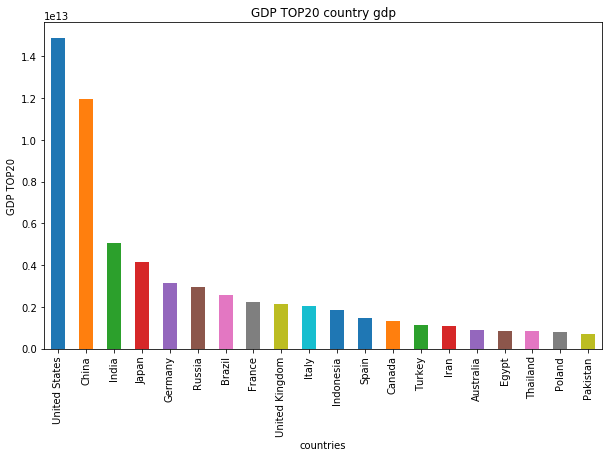

In [80]:
df['gdp_total'].head(20).plot(kind='bar',figsize=(10,6));
plt.title('GDP TOP20 country gdp')
plt.xlabel('countries')
plt.ylabel('GDP TOP20')

In [81]:
df['gdp_total'].loc[['United States', 'China']].sum() / df['gdp_total'].sum()

0.36774440514419576

> GDP最大的前两位分别为美国、中国，且两个国家GDPz占世界GDP的36.77%

In [82]:
df.columns

Index(['gdp_total', 'gdp_per_capita', 'co2_emission', 'tax_p_gdp', 'tax'], dtype='object')

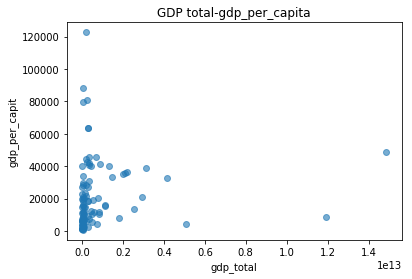

In [83]:
#'gdp_total']与'gdp_per_capita'关系
plt.scatter(df['gdp_total'], df['gdp_per_capita'], alpha=0.6)
plt.title('GDP total-gdp_per_capita')
plt.xlabel('gdp_total')
plt.ylabel('gdp_per_capit')


plt.show()

> 各国GDP总值和人均GDP并非呈现一致性，从top10 可以看出，发展中国家虽然GDP总值虽然高，但是人均较低。 

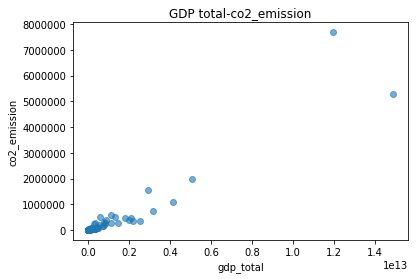

In [84]:
#gdp_total与co2_emission关系

plt.scatter(df['gdp_total'], df['co2_emission'], alpha=0.6)
plt.title('GDP total-co2_emission')
plt.xlabel('gdp_total')
plt.ylabel('co2_emission')
plt.show()

> 从图上可以看出GDP总值越高，co2排放量呈现增大趋势。但第二位的中国co2排放量相对更高，可以说明中国GDP带来比较严重的污染问题。

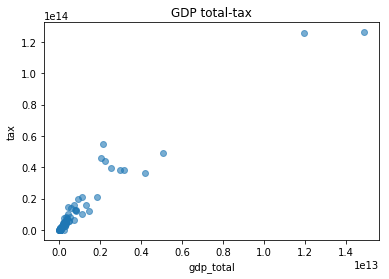

In [85]:
plt.scatter(df['gdp_total'], df['tax'], alpha=0.6)
plt.title('GDP total-tax')
plt.xlabel('gdp_total')
plt.ylabel('tax')
plt.show()

> 从图上可以看出GDP总值越高，税收总值呈现增大趋势。

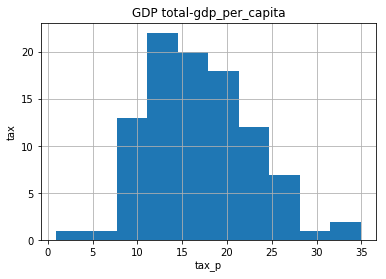

In [86]:
df['tax_p_gdp'].hist();
plt.title('GDP total-gdp_per_capita')
plt.xlabel('tax_p')
plt.ylabel('tax')
plt.show()

> 从表中可以看出，总体上，税收占GDP的比例，随着GDP波动较大，但大致范围为7%-28%。

<a id='conclusions'></a>
## 结论

### 数据局限性

1、原始数据中一些国家由于存在缺失值，在分析时直接删除，造成偏差；
2、由于数据库更新不同意，没有使用本年的数据，造成一些结论不准确；
3、原始数据对税收涵盖的项目没有进行详细说明，因此可能造成结论不准确；
4、原始数据中没有说明哪些为发展中国家，因此对第4条结论不太严谨。

### 此次分析主要是为了熟悉分析的过程了思路，数据分析具有一定的局限性，仅作为练习。

> 1、**GDP最大的20个国家**分别为： 'United States', 'China', 'India', 'Japan', 'Germany', 'Russia', 'Brazil', 'France', 'United Kingdom', 'Italy', 'Indonesia', 'Spain', 'Canada', 'Turkey', 'Iran', 'Australia', 'Egypt', 'Thailand', 'Poland', 'Pakistan'

> 2、**GDP最小的10的国家**分别为：'Moldova', 'Iceland', 'Malta', 'Bahamas', 'Sierra Leone', 'Togo', 'Bhutan', 'Maldives', 'Cape Verde', 'Seychelles'

>3、 GDP最大的前两位分别为美国、中国，且两个国家GDPz占世界GDP的36.77%

> 4、各国GDP总值和人均GDP并非呈现一致性，从top10 可以看出，发展中国家(中国、印度)虽然GDP总值虽然高，但是人均较低；

> 5、从图上可以看出GDP总值越高，co2排放量呈现增大趋势。

> 6、从图上可以看出GDP总值越高，税收总值呈现增大趋势。

> 7、从表中可以看出，总体上，税收占GDP的比例，随着GDP波动较大，但大致范围为7%-28%。

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295